In [1]:
import gifba
rel_abund = "equal"
# rel_abund = [0.8, 0.2]
iters = 10
step_size=1

# load models and media:
sim = "4a"
models, media = gifba.utils.load_simple_models(sim)

# initialize community
community = gifba.gifbaObject(models, media, rel_abund=rel_abund)

# run iterations
# media_flux, org_flux = community.run_gifba(iters=iters, method="pfba", early_stop=True, v=True)
media_flux, org_flux = community.consist_check(iters=iters, method="pfba", early_stop=True, v=True)

Set parameter Username
Set parameter LicenseID to value 2773321
Academic license - for non-commercial use only - expires 2027-02-01
Read LP format model from file /tmp/tmpls5ddnhk.lp
Reading time = 0.00 seconds
: 8 rows, 20 columns, 32 nonzeros
Read LP format model from file /tmp/tmpei1g9bia.lp
Reading time = 0.00 seconds
: 6 rows, 16 columns, 26 nonzeros


AttributeError: 'gifbaObject' object has no attribute 'consist_check'

In [2]:
import gifba
# rel_abund = [0.5, 0.5]
rel_abund = [0.2, 0.8]
# rel_abund = [0.8, 0.2]
iters = 10
step_size=1

# load models and media:
sim = "5a"
models, media = gifba.utils.load_simple_models(sim)

# initialize community
community = gifba.gifbaObject(models, media, rel_abund=rel_abund)

# run iterations
# media_flux, org_flux = community.run_gifba(iters=iters, method="pfba", early_stop=True, v=True)
media_flux, org_flux = community.run_gifba(iters=iters, method="pfba", early_stop=True, v=True)

Read LP format model from file /tmp/tmp85u2n84c.lp
Reading time = 0.00 seconds
: 6 rows, 14 columns, 24 nonzeros
Read LP format model from file /tmp/tmp2wqsogl5.lp
Reading time = 0.00 seconds
: 6 rows, 14 columns, 24 nonzeros

Iteration: 0
#############################################
Run Info
Objective value (model 0): 50.0
Objective value (model 1): 0.0

env fluxes (mmol/(gT/hr)):
Ex_B            0.0
Ex_A           10.0
exchangeBio     0.0
Name: (0, 0), dtype: float64

org fluxes (mmol/(gT/hr)):
       Ex_B  Ex_A  exchangeBio
Model                         
0      10.0 -10.0         10.0
1       0.0   0.0          0.0
#############################################


Iteration: 1
#############################################
Run Info
Objective value (model 0): 50.0
Objective value (model 1): 12.5

env fluxes (mmol/(gT/hr)):
Ex_B           10.0
Ex_A           10.0
exchangeBio    10.0
Name: (1, 0), dtype: float64

org fluxes (mmol/(gT/hr)):
       Ex_B  Ex_A  exchangeBio
Model            

(16,)
(16,)
(16,)
(16,)
          OC          X  rerun_ct  iter
0   0.000000   0.000000      -1.0   1.0
1   2.000000  10.000000       0.0   1.0
2   0.500000   5.000000       1.0   1.0
3   0.666667   6.666667       2.0   1.0
4   0.000000   0.000000      -1.0   2.0
5   1.200000  27.777778       0.0   2.0
6   0.662963  23.148148       1.0   2.0
7   0.721073  26.053640       2.0   2.0
8   0.000000   0.000000      -1.0   3.0
9   1.800000  11.904762       0.0   3.0
10  0.661376   6.613757       1.0   3.0
11  0.818729   8.187290       2.0   3.0
12  0.000000   0.000000      -1.0   4.0
13  1.200000  27.777778       0.0   4.0
14  0.662963  23.148148       1.0   4.0
15  0.721073  26.053640       2.0   4.0


Text(0.5, 1.0, 'Overconsumption vs X')

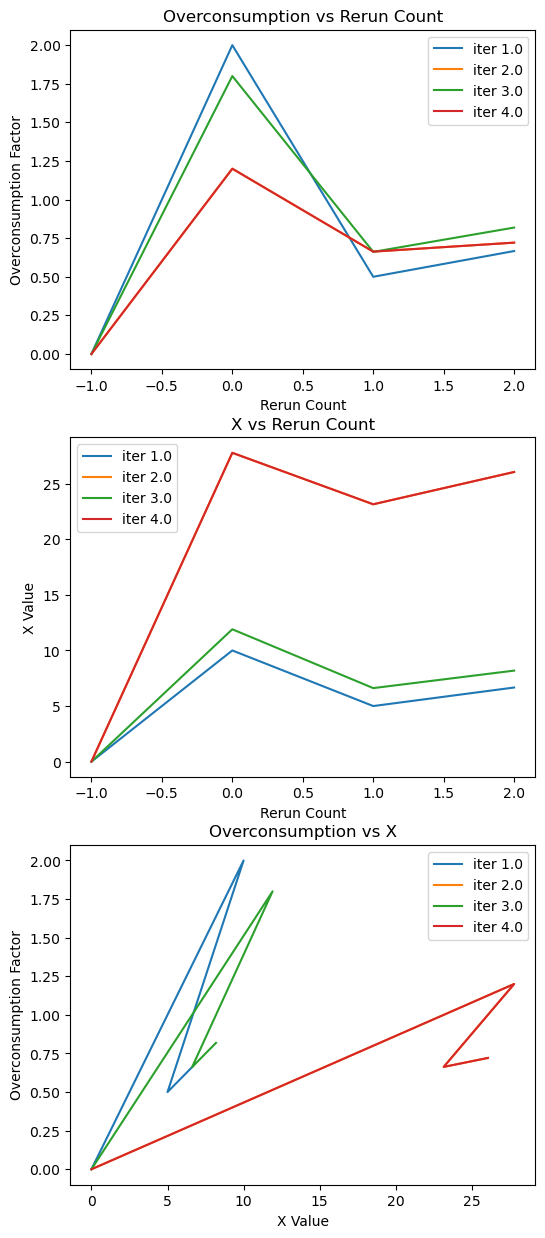

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(np.array(community.OC_list).shape)
print(np.array(community.X_list).shape)
print(np.array(community.rerun_list).shape)
print(np.array(community.iter_list).shape)
OC_meta = pd.DataFrame(np.array([community.OC_list, community.X_list, community.rerun_list, community.iter_list]).T, columns=["OC", "X", "rerun_ct", "iter"])
print(OC_meta)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,15))
for iter in OC_meta.iter.unique():
    iter_df = OC_meta[OC_meta.iter == iter]
    ax[0].plot(iter_df.rerun_ct, iter_df.OC, label=f"iter {iter}")
    ax[1].plot(iter_df.rerun_ct, iter_df.X, label=f"iter {iter}")
    ax[2].plot(iter_df.X, iter_df.OC, label=f"iter {iter}")


ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlabel("Rerun Count")
ax[0].set_ylabel("Overconsumption Factor")
ax[0].set_title("Overconsumption vs Rerun Count")
ax[1].set_xlabel("Rerun Count")
ax[1].set_ylabel("X Value")
ax[1].set_title("X vs Rerun Count")
ax[2].set_xlabel("X Value")
ax[2].set_ylabel("Overconsumption Factor")
ax[2].set_title("Overconsumption vs X")


In [2]:
community.env_fluxes

,exchangeBio,Ex_A,Ex_B
Iteration,,,
0,0.0,10.0,0.0
1,10.0,10.0,10.0
2,10.0,10.0,2.0
3,10.0,10.0,8.0
4,10.0,10.0,2.0
5,10.0,10.0,8.0
6,10.0,10.0,2.0
7,10.0,10.0,8.0
8,10.0,10.0,2.0


In [3]:
community.org_fluxes


,,T_A,T_Biomass,Ex_A,T_B,Biomass,exchangeBio,Ex_B
Model,Iteration,,,,,,,
0,0,10.0,10.0,-10.0,10.0,10.0,10.0,10.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,2.0,2.0,-2.0,2.0,2.0,2.0,2.0
1,1,8.0,8.0,-8.0,8.0,8.0,8.0,-8.0
0,2,8.0,8.0,-8.0,8.0,8.0,8.0,8.0
1,2,2.0,2.0,-2.0,2.0,2.0,2.0,-2.0
0,3,2.0,2.0,-2.0,2.0,2.0,2.0,2.0
1,3,8.0,8.0,-8.0,8.0,8.0,8.0,-8.0
0,4,8.0,8.0,-8.0,8.0,8.0,8.0,8.0


In [5]:
for idx, model in enumerate(models):
    print(idx, " of 2 models")
    for rxn in model.reactions:
        print(rxn.id, "  ", end="")
        for met in rxn.metabolites:
            if rxn.metabolites[met] < 0:
                print(f"{-rxn.metabolites[met]}*{met.id}", end="    ")

        print("->   ", end="")
        for met in rxn.metabolites:
            if rxn.metabolites[met] > 0:
                print(f" {abs(rxn.metabolites[met])}*{met.id}", end="    ")
        print()
    print()

0  of 2 models
Ex_A   1*A_e    ->   
Ex_C   1*C_e    ->   
T_A   1*A_e    ->    1*A_c    
T_C   1*C_c    ->    1*C_e    
T_Biomass   1*biomass1    ->    1*biomass1e    
Biomass   1*A_c    ->    1*biomass1     1*C_c    
exchangeBio   1.0*biomass1e    ->   

1  of 2 models
Ex_C   1*C_e    ->   
Ex_A   1*A_e    ->   
T_C   1*C_e    ->    1*C_c    
T_A   1*A_e    ->    1*A_c    
Biomass   1*A_c    1*C_c    ->    1*biomass2    
T_Biomass   1*biomass2    ->    1*biomass2e    
exchangeBio   1.0*biomass2e    ->   



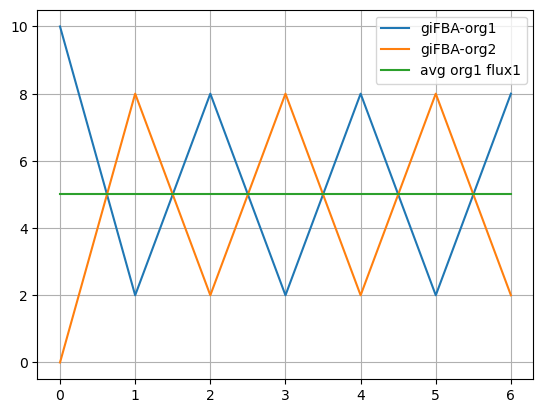

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(community.org_fluxes.loc[0,"exchangeBio"], label='giFBA-org1')
plt.plot(community.org_fluxes.loc[1,"exchangeBio"], label='giFBA-org2')
plt.plot([org_flux.loc[0, "exchangeBio"]] *community.iters, label='avg org1 flux1')
plt.legend()
plt.grid()
plt.show()




In [ ]:
community.env_fluxes

,exchangeBio,Ex_A,Ex_C
Iteration,,,
0,0.0,10.0,0.000000
1,10.0,10.0,10.000000
2,10.0,10.0,8.000000
3,10.0,10.0,8.333333
4,10.0,10.0,8.275862
...,...,...,...
96,10.0,10.0,8.284271
97,10.0,10.0,8.284271
98,10.0,10.0,8.284271


In [ ]:
community.org_fluxes

,,exchangeBio,T_A,T_Biomass,Ex_C,Biomass,Ex_A,T_C
Model,Iteration,,,,,,,
0,0,10.000000,10.000000,10.000000,10.000000,10.000000,-10.000000,10.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,1,8.000000,8.000000,8.000000,8.000000,8.000000,-8.000000,8.000000
1,1,2.000000,2.000000,2.000000,-2.000000,2.000000,-2.000000,2.000000
0,2,8.333333,8.333333,8.333333,8.333333,8.333333,-8.333333,8.333333
...,...,...,...,...,...,...,...,...
1,97,1.715729,1.715729,1.715729,-1.715729,1.715729,-1.715729,1.715729
0,98,8.284271,8.284271,8.284271,8.284271,8.284271,-8.284271,8.284271
1,98,1.715729,1.715729,1.715729,-1.715729,1.715729,-1.715729,1.715729


In [15]:
community.summarize()

Metabolite,Exchange,Flux,C-Number,C-Flux
biomass2e,exchangeBio,10.0,0,0.00%
C_e,Ex_C,8.0,0,0.00%
Metabolite,Exchange,Flux,C-Number,C-Flux
A_e,Ex_A,2.0,0,0.00%
Metabolite,Exchange,Flux,C-Number,C-Flux
biomass2e,exchangeBio,2.0,0,0.00%
C_e,Ex_C,2.0,0,0.00%
Metabolite,Exchange,Flux,C-Number,C-Flux
A_e,Ex_A,8.0,0,0.00%
C_e,Ex_C,8.0,0,0.00%
